# Tutorial for params_MOT

This package fits various parameters to images of molecules or atoms trapped in a magneto-optical trap (MOT).

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters
import seaborn as sns
import pandas as pd
import os

import math
import emcee

from params_MOT.io_package import get_data_file_path, load_data, load_image
from params_MOT.model import *
import params_MOT as pm

### Set parameters

In [2]:
#mc_params=(Walkers,Steps)
mc_params=(200,800)

#initial_guess = [center_x, center_y, amplitude, sigma_x, sigma_y, background_offset, sigma_m, readout_charge]
initial_guess = [25, 25, 100, 10, 10, 100, 20, 60]


### Run Model on Data and Show Results

The MCMC is contained in the function find_params_MOT in model.py. This function runs MCMC using the pm.sampler function, which calls upon the emcee package to compute marginal posteriors for the model parameters. There are 8 parameters to be marginalized over, which is encompassed in the variable theta in our package. theta is an array consisting of the following parameters:
(center_x, center_y, amplitude, sigma_x, sigma_y, background_offset, sigma_m, sigma_g)
The first 5 parameters give the 2D Gaussian for the MOT. background_offset is self-explanator. sigma_m is the uncertainty in the model, and sigma_m is the uncertainty from the scattered light background. When calling upon the find_params_MOT function, we have to specify an 8-tuple consisting of the initial guesses for theta, and also the duple mc_params = (nwalkers, nsteps) which controls the parameters of the MCMC.
From there one only needs to specify the filename of the data (which is presumed to be in the root folder of params_MOT, and the function will automatically run the MCMC and conclude the best fit parameters from the 50th percentile of the final state of the walkers.

Loading data...
Data loaded. Setting up emcee sampler...
Done
Emcee sampler setup finished. Running MCMC...
       sigma_x   sigma_y
0.16  8.279122  6.759501
0.50  8.454759  6.923170
0.84  8.628053  7.083827


C:\Users\Loic\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


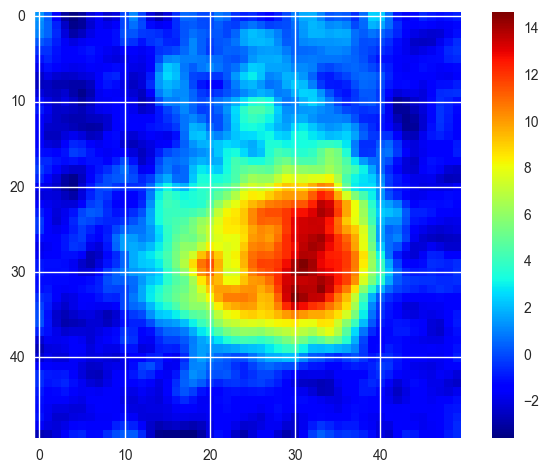

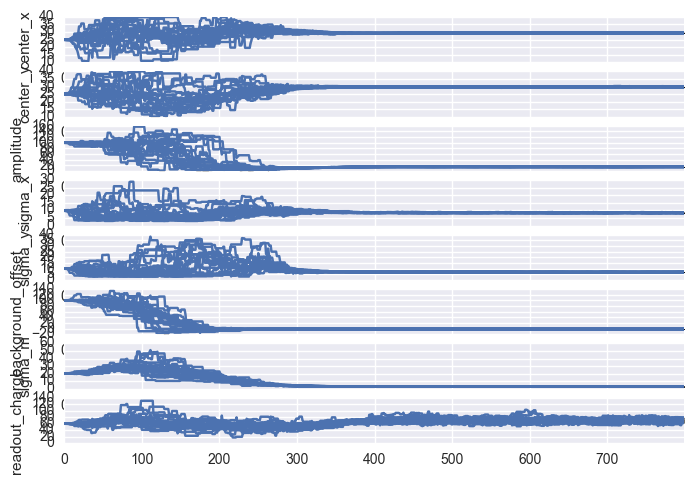

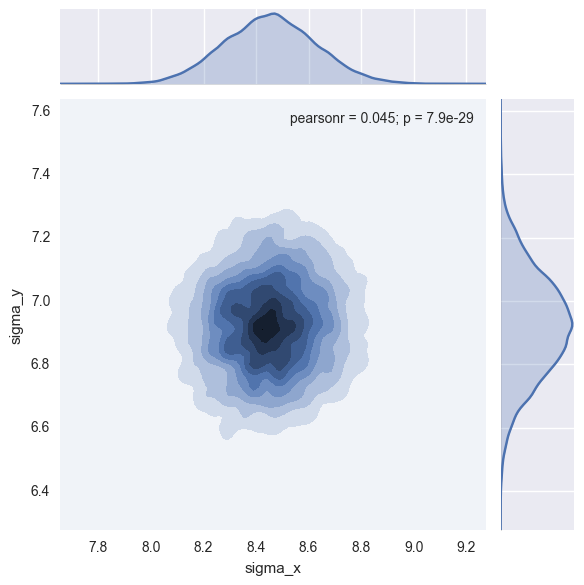

In [3]:
find_params_MOT('RealMOTImageForTest.csv',50,mc_params,initial_guess)